In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data ={
    'Abstractor': ['Original', 'IRR', 'Original', 'IRR', 'Original', 'IRR',
                   'Original', 'IRR', 'Original', 'IRR', 'Original', 'IRR',
                   'Original', 'IRR', 'Original', 'IRR', 'Original', 'IRR',
                   'Original', 'IRR'],
    'Record_ID': [1001, 1001, 1002, 1002, 1003, 1003, 1004, 1004, 1005, 1005,
                  1006, 1006, 1007, 1007, 1008, 1008, 1009, 1009, 1010, 1010],
    'LVSD': ['Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
             'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y'],
    'ACEI_at_Discharge': ['N', 'N', 'n/a', 'Y', 'N', 'N', 'Y', 'Y', 'n/a', 'n/a',
                          'N', 'N', 'Y', 'N', 'n/a', 'N', 'N', 'N', 'Y', 'Y'],
    'ARB_at_Discharge': ['N', 'N', 'n/a', 'n/a', 'N', 'N', 'n/a', 'n/a', 'n/a', 'n/a',
                         'Y', 'Y', 'n/a', 'N', 'n/a', 'N', 'N', 'N', 'n/a', 'n/a'],
    'Reason_for_No_ACEI_and_No_ARB_at_Discharge': ['Y', 'Y', 'n/a', 'n/a', 'N', 'Y', 'n/a', 'n/a', 'n/a', 'n/a',
                                                    'n/a', 'n/a', 'n/a', 'Y', 'n/a', 'Y', 'Y', 'N', 'n/a', 'n/a']
}

df = pd.DataFrame(data)
attributes = ['LVSD', 'ACEI_at_Discharge', 'ARB_at_Discharge', 'Reason_for_No_ACEI_and_No_ARB_at_Discharge']

#DEAR
Data Element Agreement Rate

In [18]:
def DEAR(df, attribute, abstractor):
    # Find all case_ids handled at least once by this abstractor
    abs_case_ids = df.loc[df['Abstractor'] == abstractor, 'Record_ID'].unique()

    # Count repeats in the entire dataframe
    case_counts = df['Record_ID'].value_counts()
    repeated_case_ids = [case for case in abs_case_ids if case_counts.get(case, 0) > 1]

    total_repeats = len(repeated_case_ids)
    if total_repeats == 0:
        return 0

    consensus_count = 0
    for case in repeated_case_ids:
        decisions = df.loc[df['Record_ID'] == case, attribute]
        if decisions.nunique() == 1:
            consensus_count += 1
    return consensus_count / total_repeats


In [19]:
for attribute in attributes:
    dear = DEAR(df, attribute, 'Original')
    print(f'DEAR of Original for {attribute} is {dear * 100}%')

DEAR of Original for LVSD is 80.0%
DEAR of Original for ACEI_at_Discharge is 70.0%
DEAR of Original for ARB_at_Discharge is 80.0%
DEAR of Original for Reason_for_No_ACEI_and_No_ARB_at_Discharge is 60.0%


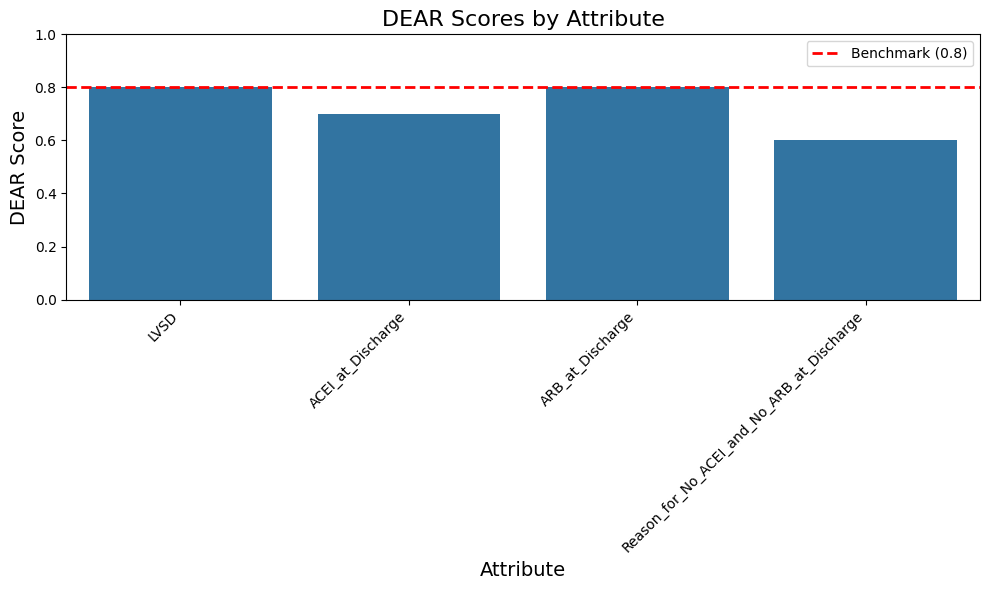

In [23]:
# Collect DEAR results for each attribute
dear_results = []
for attr in attributes:
    score = DEAR(df, attr, abstractor="Original")  # replace "John" with your abstractor
    dear_results.append({'Attribute': attr, 'DEAR Score': score})

# Convert results to a DataFrame
dear_df = pd.DataFrame(dear_results)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=dear_df, x='Attribute', y='DEAR Score')

# Add benchmark line at 0.8
plt.axhline(0.8, color='red', linestyle='--', linewidth=2, label='Benchmark (0.8)')

# Styling
plt.title('DEAR Scores by Attribute', fontsize=16)
plt.ylabel('DEAR Score', fontsize=14)
plt.xlabel('Attribute', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()